In [ ]:
import sqlite3
import json
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [18]:
db_path = "../../exp/annotations.db"

conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [25]:
# Get the table names
table_names = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
table_names = [name[0] for name in table_names]
print("Table Names:")
for name in table_names:
    print(name)

# Get the schema of each table
for name in table_names:
    print("\nSchema for table", name)
    schema = cursor.execute("PRAGMA table_info({})".format(name)).fetchall()
    for column in schema:
        print(column[1], column[2])

Table Names:
visual_genome_densecap_local_train
visual_genome_densecap_local_eval_visual_genome_densecap_local_densecap_test

Schema for table visual_genome_densecap_local_train
region_id INTEGER
image_id INTEGER
width INTEGER
height INTEGER
file_name TEXT
coco_url TEXT
task_type TEXT
phrases TEXT
tokenized_phrases TEXT
x REAL
y REAL
region_width REAL
region_height REAL

Schema for table visual_genome_densecap_local_eval_visual_genome_densecap_local_densecap_test
region_id INTEGER
image_id INTEGER
width INTEGER
height INTEGER
file_name TEXT
coco_url TEXT
task_type TEXT
phrases TEXT
tokenized_phrases TEXT
x REAL
y REAL
region_width REAL
region_height REAL


In [41]:
table_id = 0
fetch =  cursor.execute("SELECT tokenized_phrases FROM {}".format(table_names[table_id]))
print("\nRows for table", table_names[table_id])
num_tokens = []
for row in fetch:
    row = json.loads(row[0])
    for phrase in row:
        num_tokens.append(len(phrase))
threshold = 20
num_tokens_array = np.array(num_tokens)
np.sum(num_tokens_array > threshold), len(num_tokens_array), np.sum(num_tokens_array > threshold)  / len(num_tokens_array)


Rows for table visual_genome_densecap_local_train


(929, 3684063, 0.00025216724035392445)

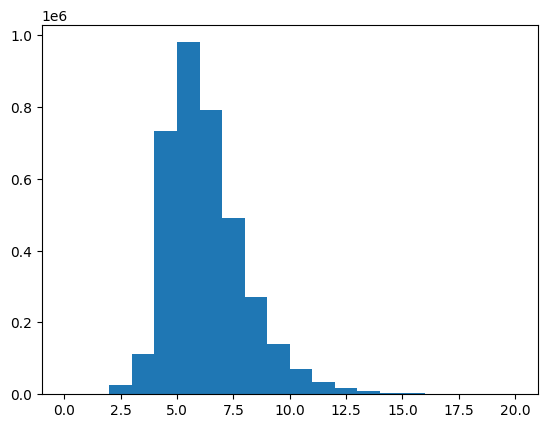

In [42]:
out = plt.hist(num_tokens, bins=20, range=(0, 20))

In [45]:
table_id = 1
fetch =  cursor.execute("SELECT tokenized_phrases FROM {}".format(table_names[table_id]))
print("\nRows for table", table_names[table_id])
num_tokens = []
for row in fetch:
    row = json.loads(row[0])
    for phrase in row:
        num_tokens.append(len(phrase))
threshold = 20
num_tokens_array = np.array(num_tokens)
np.sum(num_tokens_array > threshold), len(num_tokens_array), np.sum(num_tokens_array > threshold)  / len(num_tokens_array)


Rows for table visual_genome_densecap_local_eval_visual_genome_densecap_local_densecap_test


(60, 238069, 0.0002520277734606354)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

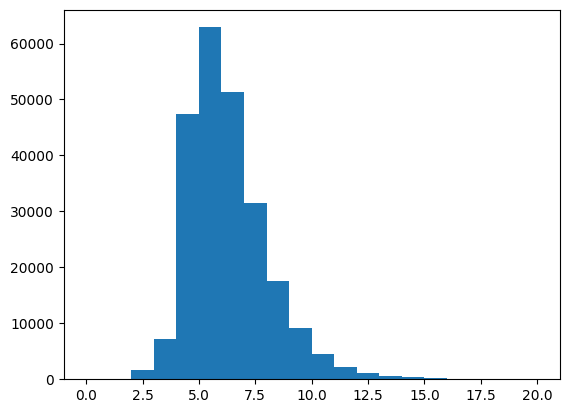

In [44]:
plt.hist(num_tokens, bins=20, range=(0, 20))
plt.set_xlabel("Number of tokens")